<a href="https://colab.research.google.com/github/Tsatthienmach/AiSummerCode/blob/master/week4/Boston_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Clone the entire repo.
!git clone -l -s https://github.com/Tsatthienmach/AiSummerCode.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 55 (delta 17), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (55/55), done.
/content/cloned-repo
_config.yml  documentations  README.md	week2  week4


In [3]:
data = pd.read_csv('/content/cloned-repo/week4/Boston_Dataset.csv'  , header= 0 )
print(data)

      ID      crim    zn  indus  chas  ...  tax  ptratio   black  lstat  medv
0      1   0.00632  18.0   2.31     0  ...  296     15.3  396.90   4.98  24.0
1      2   0.02731   0.0   7.07     0  ...  242     17.8  396.90   9.14  21.6
2      4   0.03237   0.0   2.18     0  ...  222     18.7  394.63   2.94  33.4
3      5   0.06905   0.0   2.18     0  ...  222     18.7  396.90   5.33  36.2
4      7   0.08829  12.5   7.87     0  ...  311     15.2  395.60  12.43  22.9
5     11   0.22489  12.5   7.87     0  ...  311     15.2  392.52  20.45  15.0
6     12   0.11747  12.5   7.87     0  ...  311     15.2  396.90  13.27  18.9
7     13   0.09378  12.5   7.87     0  ...  311     15.2  390.50  15.71  21.7
8     14   0.62976   0.0   8.14     0  ...  307     21.0  396.90   8.26  20.4
9     15   0.63796   0.0   8.14     0  ...  307     21.0  380.02  10.26  18.2
10    16   0.62739   0.0   8.14     0  ...  307     21.0  395.62   8.47  19.9
11    17   1.05393   0.0   8.14     0  ...  307     21.0  386.85

In [0]:
data_len = len(data)
features = data.values[:,1:-1]
prices = data.values[:,-1]

In [0]:
features = np.concatenate((features , np.ones((features.shape[0] , 1))) , axis = 1)

In [0]:
print(features[0,:])

In [29]:
n = features.shape[1] # size of individual
m = 200 # size of population
n_generations = 2000 # number of generations

print(n)

14


In [0]:
def generate_random_value(bound = 100):
    return random.random()*bound

In [0]:
def compute_loss(individual):
    estimated_prices =  []
    for feature in features:
        estimated_price = sum([c*x for c,x in zip(feature , individual)])
        estimated_prices.append(estimated_price)
    losses = [abs(y_est - y_gt) for y_est , y_gt in zip(estimated_prices, prices)]
    return sum(losses)  

In [0]:
def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness = 1/(loss+1)
    return fitness

In [0]:
def create_individual():
     return [generate_random_value() for _ in range(n)]

In [0]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_n = individual1.copy()
    individual2_n = individual2.copy()
    for i in range(n):
        if random.random() < crossover_rate :
            individual1_n[i] = individual2[i]
            individual2_n[i] = individual1[i]
    return individual1_n , individual2_n

In [0]:
def mutate(individual , mutate_rate = 0.05):
    individual_n = individual.copy()
    for i in range (n):
        if random.random() < mutate_rate:
            individual_n[i] = generate_random_value()
    return individual_n 

In [0]:
def selection(sorted_old_population):
    index1 = random.randint(0,m-1)
    while True:
        index2 = random.randint(0,m-1)
        if index2 != index1 :
            break
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [0]:
def create_new_population(old_population , elitism = 2  , gen = 1):
    sorted_population = sorted(old_population , key = compute_fitness)
    # print(sorted_population)
    if gen%200 == 0:
        print('Best loss= ', compute_loss(sorted_population[m-1]))
    losses.append(compute_loss(sorted_population[m-1]))
    new_population = []

    while len(new_population) < m - elitism:
        # selection
        individual_s1 = selection(sorted_population)
        individual_s2 = selection(sorted_population)
        # crossover
        individual_n1, individual_n2 = crossover(individual_s1 , individual_s2)
        # mutate
        individual_c1 = mutate(individual_n1)
        individual_c2 = mutate(individual_n2)
        new_population.append(individual_c1)
        new_population.append(individual_c2)
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind.copy()) 
    return new_population

Best loss=  3742684.250755915
Best loss=  47740.64261458065
Best loss=  20962.871228867105
Best loss=  11104.844633397384
Best loss=  3513.1011676780117
Best loss=  3120.6565521829007
Best loss=  2598.850618565062
Best loss=  2596.3781310645263
Best loss=  2550.5105562379836
Best loss=  2257.4675635408153


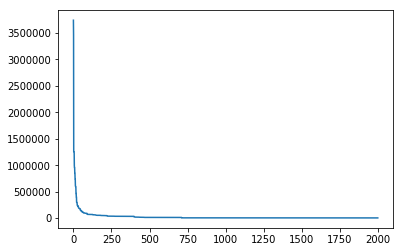

In [38]:
population = [create_individual() for _ in range(m)]
losses = []
for i in range(n_generations):
    m = len(population)
    population = create_new_population(population, 2,i )

import matplotlib.pyplot as plt 
plt.plot([i for i in range(n_generations)] , losses)
plt.show()

In [0]:
def predict(area):
    area = np.array(area)
    result = []
    for i in area:
        result.append(sum(np.dot(area, population[m-1])))
    return result     

In [43]:
area = [features[0]]
print('Gia tri du doan la : ', predict(area))

Gia tri du doan la :  [20.770177102455094]


[0.03612012164329048, 0.1340034034908677, 0.12637339648899903, 6.426184784862454, 0.0004329722818940951, 0.21763144729305406, 0.05721590223547457, 1.6459916032161792, 0.009187855256942434, 0.004503953739509736, 0.03460413453112432, 0.010074522655478813, 0.02534089420674901, 0.17564571102731685]
2240.25654230229


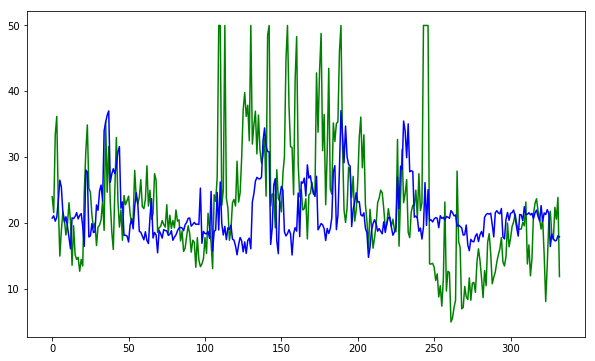

In [41]:
sorted_population = sorted(population , key = compute_fitness)
print(sorted_population[m-1])
individual = sorted_population[m-1]
estimated_prices = []
for feature in features :
    estimated_price = sum(x*c for x ,c  in zip(feature , individual))
    estimated_prices.append(estimated_price)
losses = [abs(y_est- y_gt)  for y_est , y_gt in zip(estimated_prices , prices)]
print(sum(losses))

fig , ax = plt.subplots(figsize = (10,6))
plt.plot(prices , c  = 'g')
plt.plot(estimated_prices , c = 'b')
plt.show()